In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

# To ignore warnings
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('amazon_delivery.csv')

In [4]:
df.head(10)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
5,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,Cloudy,Jam,motorcycle,Urban,130,Toys
6,njmo150975311,33,4.7,23.369746,85.339820,23.479746,85.449820,2022-03-04,19:15:00,19:30:00,Fog,Jam,scooter,Metropolitian,200,Toys
7,jvjc772545076,35,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,17:30:00,Cloudy,Medium,motorcycle,Metropolitian,160,Snacks
8,uaeb808891380,22,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,20:55:00,21:05:00,Stormy,Jam,motorcycle,Metropolitian,170,Electronics
9,bgvc052754213,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,Jam,motorcycle,Metropolitian,230,Toys


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [6]:
df.describe()


,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [7]:
df.describe(include='object')

,Order_ID,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Category
count,43739,43739,43739,43739,43648,43739,43739,43739,43739
unique,43739,44,177,193,6,5,4,4,16
top,ialx566343618,2022-03-15,21:55:00,21:30:00,Fog,Low,motorcycle,Metropolitian,Electronics
freq,1,1141,460,481,7440,14999,25527,32698,2849


In [8]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

#  Identifies the unique values in every column

In [9]:
df.nunique()

Order_ID           43739
Agent_Age             22
Agent_Rating          28
Store_Latitude       521
Store_Longitude      415
Drop_Latitude       4367
Drop_Longitude      4367
Order_Date            44
Order_Time           177
Pickup_Time          193
Weather                6
Traffic                5
Vehicle                4
Area                   4
Delivery_Time         89
Category              16
dtype: int64

In [10]:
df['Agent_Rating'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, 3.8,
       nan, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
       2.8, 2.9, 3. ])

In [11]:
df['Weather'].unique()  #there is nan

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

In [12]:
df['Traffic'].unique()  #there is nan

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [13]:
df['Vehicle'].unique()

array(['motorcycle ', 'scooter ', 'van', 'bicycle '], dtype=object)

In [14]:
df['Area'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'Other'], dtype=object)

In [15]:
df['Category'].unique()

array(['Clothing', 'Electronics', 'Sports', 'Cosmetics', 'Toys', 'Snacks',
       'Shoes', 'Apparel', 'Jewelry', 'Outdoors', 'Grocery', 'Books',
       'Kitchen', 'Home', 'Pet Supplies', 'Skincare'], dtype=object)

In [16]:
exp_col=['Weather', 'Traffic' , 'Vehicle','Area','Category']

for col in exp_col:
    print(f"Unique values in '{col}':")
    print(df[col].value_counts())

Unique values in 'Weather':
Weather
Fog           7440
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64
Unique values in 'Traffic':
Traffic
Low        14999
Jam        13725
Medium     10628
High        4296
NaN           91
Name: count, dtype: int64
Unique values in 'Vehicle':
Vehicle
motorcycle     25527
scooter        14639
van             3558
bicycle           15
Name: count, dtype: int64
Unique values in 'Area':
Area
Metropolitian     32698
Urban              9751
Other              1138
Semi-Urban          152
Name: count, dtype: int64
Unique values in 'Category':
Category
Electronics     2849
Books           2824
Jewelry         2802
Toys            2781
Skincare        2772
Snacks          2770
Outdoors        2747
Apparel         2726
Sports          2719
Grocery         2691
Pet Supplies    2690
Home            2685
Cosmetics       2677
Kitchen         2673
Clothing        2667
Shoes           2666
Name:

# 2.Data Cleaning


**Goals:**

* Drop unnecessary columns & rename for clarity
* Detect & Remove Duplicate Rows
* Handle Missing Values
* Detect & Handle Outliers
* Detect & Correct Noisy Data
* Check for Inconsistencies

In [17]:
df_clean=df.copy()

In [18]:
df_clean

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [19]:
df_clean = df_clean.rename(columns=
                          {'Agent_Rating':'Order_Rating'})

In [20]:
df_clean.duplicated().sum() #we haven't duplicates

0

In [21]:
df_clean.isnull().sum()

Order_ID            0
Agent_Age           0
Order_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [22]:
df_clean[df_clean['Order_Rating'] > 5]
# no rating more than 6


,Order_ID,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
3438,nzsa056960624,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,NaN,12:30:00,NaN,NaN,van,Urban,125,Cosmetics
4514,eids248121351,50,6.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,NaN,23:20:00,NaN,NaN,bicycle,Metropolitian,135,Jewelry
4958,tznn437423907,50,6.0,-26.910262,-75.783013,27.020262,75.893013,2022-03-18,NaN,18:50:00,NaN,NaN,scooter,Metropolitian,100,Skincare
5142,dazy306268524,50,6.0,12.914264,77.678400,13.024264,77.788400,2022-04-06,NaN,20:55:00,NaN,NaN,van,Metropolitian,18,Grocery
5418,jzlx800086920,50,6.0,-27.159795,-78.042990,27.209795,78.092990,2022-02-13,NaN,18:05:00,NaN,NaN,scooter,Metropolitian,100,Electronics
6132,yiuy815061054,50,6.0,26.911927,75.797282,27.041927,75.927282,2022-04-02,NaN,22:10:00,NaN,NaN,van,Urban,100,Shoes
6741,tvsb800453924,50,6.0,-12.352058,-76.606650,12.372058,76.626650,2022-03-15,NaN,10:00:00,NaN,NaN,scooter,Metropolitian,70,Clothing
7364,nkcq202684713,50,6.0,0.000000,0.000000,0.010000,0.010000,2022-03-21,NaN,08:35:00,NaN,NaN,bicycle,Metropolitian,110,Books
9113,hkvr567845937,50,6.0,12.933298,77.614293,13.003298,77.684293,2022-03-12,NaN,18:25:00,NaN,NaN,scooter,Urban,85,Outdoors
9148,jysr585437673,50,6.0,-23.374989,-85.335486,23.444989,85.405486,2022-03-20,NaN,17:55:00,NaN,NaN,bicycle,Metropolitian,160,Home


In [23]:
df_clean[df_clean.isnull().any(axis=1)]

,Order_ID,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
124,uurs547552548,23,NaN,22.569358,88.433452,22.599358,88.463452,2022-02-17,23:25:00,23:35:00,Sunny,Low,motorcycle,Metropolitian,75,Snacks
1996,xoaj834389107,32,NaN,0.000000,0.000000,0.050000,0.050000,2022-02-11,20:50:00,21:00:00,Sandstorms,Jam,motorcycle,Urban,185,Snacks
2002,lasr795083832,23,NaN,25.454648,81.834502,25.584648,81.964502,2022-02-18,19:50:00,19:55:00,Windy,Jam,motorcycle,Metropolitian,150,Outdoors
2018,gjcr517387117,26,NaN,0.000000,0.000000,0.080000,0.080000,2022-02-16,23:50:00,23:55:00,Cloudy,Low,scooter,Metropolitian,140,Clothing
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaN,17:20:00,NaN,NaN,motorcycle,Urban,75,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41504,ogxf318978500,20,NaN,25.451517,81.832616,25.501517,81.882616,2022-02-13,22:15:00,22:30:00,Stormy,Low,scooter,Urban,85,Shoes
42598,llox673359294,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-14,NaN,17:40:00,NaN,NaN,scooter,Metropolitian,170,Jewelry
43027,qhka163034669,20,NaN,22.514585,88.393310,22.594585,88.473310,2022-02-14,22:20:00,22:25:00,Fog,Low,scooter,Metropolitian,100,Electronics
43053,ifig993965994,15,1.0,13.086438,80.220672,13.216439,80.350672,2022-03-18,NaN,18:00:00,NaN,NaN,van,Urban,130,Jewelry


**Fill the missing values**

In [24]:
df_clean['Order_Rating']= df_clean['Order_Rating'].fillna(df_clean['Order_Rating'].median())


In [25]:
df_clean['Order_Rating'].isnull().sum()

0

In [26]:
# I couldn't handle time nan in ordertime column

df_clean['Order_Time']=df_clean['Order_Time'].dropna()
df_clean['Order_Time']

0        11:30:00
1        19:45:00
2        08:30:00
3        18:00:00
4        13:30:00
           ...   
43734    11:35:00
43735    19:55:00
43736    23:50:00
43737    13:35:00
43738    17:10:00
Name: Order_Time, Length: 43739, dtype: object

In [27]:
df_clean.describe()

,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633862,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334518,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


<Axes: xlabel='Agent_Age', ylabel='Density'>

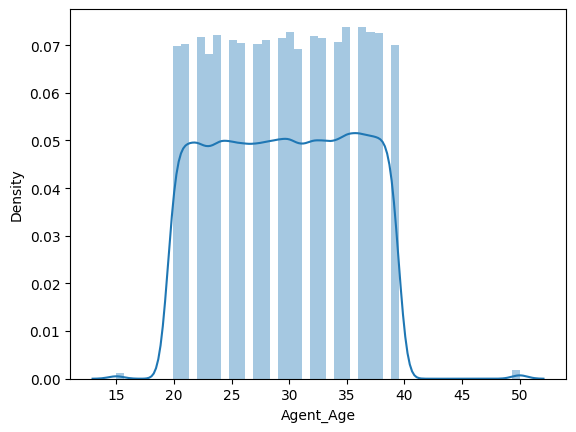

In [28]:
sns.distplot(df_clean['Agent_Age'])

<Axes: xlabel='Order_Rating', ylabel='Density'>

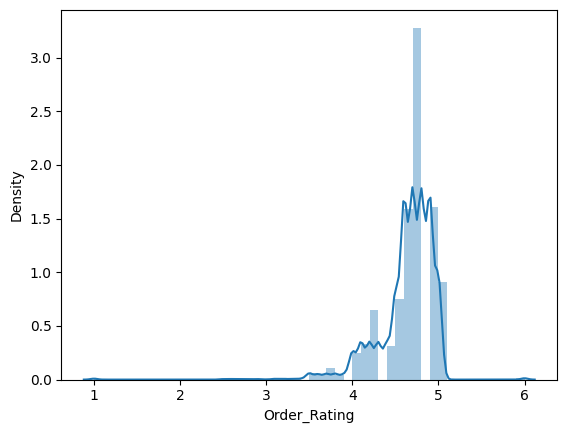

In [29]:
sns.distplot(df_clean['Order_Rating'])

In [30]:
df_clean['Weather'].mode()

0    Fog
Name: Weather, dtype: object

In [31]:
df_clean['Weather']= df_clean['Weather'].fillna(df_clean['Weather'].mode()[0])

In [32]:
df_clean['Weather'].isnull().sum()

0

In [33]:
df_clean['Traffic'].isnull().sum()

0

In [34]:
df_clean['Traffic'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [35]:
df[df_clean['Traffic']=='NaN ']


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaN,17:20:00,NaN,NaN,motorcycle,Urban,75,Home
2779,oilg311747812,15,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,NaN,20:30:00,NaN,NaN,scooter,Metropolitian,145,Kitchen
2825,pbox816153129,15,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,NaN,22:10:00,NaN,NaN,bicycle,Metropolitian,100,Clothing
3438,nzsa056960624,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,NaN,12:30:00,NaN,NaN,van,Urban,125,Cosmetics
4514,eids248121351,50,6.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,NaN,23:20:00,NaN,NaN,bicycle,Metropolitian,135,Jewelry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40359,lasg907081524,50,6.0,22.751234,75.889490,22.781234,75.919490,2022-03-17,NaN,20:40:00,NaN,NaN,scooter,Metropolitian,140,Apparel
41088,wgdm794380305,50,6.0,-12.939496,77.625999,12.949496,77.635999,2022-03-19,NaN,09:40:00,NaN,NaN,van,Metropolitian,95,Books
42598,llox673359294,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-14,NaN,17:40:00,NaN,NaN,scooter,Metropolitian,170,Jewelry
43053,ifig993965994,15,1.0,13.086438,80.220672,13.216439,80.350672,2022-03-18,NaN,18:00:00,NaN,NaN,van,Urban,130,Jewelry


In [36]:
df_clean["Traffic"] = df_clean["Traffic"].replace('NaN ', np.nan)

In [37]:
df_clean["Traffic"].isnull().sum()

91

In [38]:
df_clean["Traffic"]=df_clean["Traffic"].fillna(df_clean["Traffic"].mode()[0])

In [39]:
df_clean["Traffic"]

0          High 
1           Jam 
2           Low 
3        Medium 
4          High 
          ...   
43734      High 
43735       Jam 
43736       Low 
43737      High 
43738    Medium 
Name: Traffic, Length: 43739, dtype: object

In [40]:
df_clean["Traffic"].isnull().sum()

0

In [41]:
df_clean['Traffic'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium '], dtype=object)

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Order_Rating     43739 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43739 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


change types (inconsistincy)

In [43]:
df_clean

,Order_ID,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


# Time 

In [44]:
df_clean['Order_Date']=pd.to_datetime(df_clean['Order_Date'])


In [45]:
invalid_values = ['NaN ', 'NaN', 'null', '', ' ', 'NaT']
df_clean['Order_Time'].isin(invalid_values)


0        False
1        False
2        False
3        False
4        False
         ...  
43734    False
43735    False
43736    False
43737    False
43738    False
Name: Order_Time, Length: 43739, dtype: bool

In [46]:
df_clean['Order_Time'] = df_clean['Order_Time'].replace(['NaN ', 'NaN', 'null', '', ' ',], np.nan)

In [47]:
df_clean[pd.isna(df_clean['Order_Time'])]

,Order_ID,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaN,17:20:00,Fog,Low,motorcycle,Urban,75,Home
2779,oilg311747812,15,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,NaN,20:30:00,Fog,Low,scooter,Metropolitian,145,Kitchen
2825,pbox816153129,15,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,NaN,22:10:00,Fog,Low,bicycle,Metropolitian,100,Clothing
3438,nzsa056960624,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,NaN,12:30:00,Fog,Low,van,Urban,125,Cosmetics
4514,eids248121351,50,6.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,NaN,23:20:00,Fog,Low,bicycle,Metropolitian,135,Jewelry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40359,lasg907081524,50,6.0,22.751234,75.889490,22.781234,75.919490,2022-03-17,NaN,20:40:00,Fog,Low,scooter,Metropolitian,140,Apparel
41088,wgdm794380305,50,6.0,-12.939496,77.625999,12.949496,77.635999,2022-03-19,NaN,09:40:00,Fog,Low,van,Metropolitian,95,Books
42598,llox673359294,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-14,NaN,17:40:00,Fog,Low,scooter,Metropolitian,170,Jewelry
43053,ifig993965994,15,1.0,13.086438,80.220672,13.216439,80.350672,2022-03-18,NaN,18:00:00,Fog,Low,van,Urban,130,Jewelry


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [49]:
df_clean['Order_Time'] = df['Order_Time'].replace(['NaN ', 'NaN', 'null', 'NaT', '', ' '], np.nan)


df_clean = df_clean.dropna(subset=['Order_Time'])

print(df_clean['Order_Time'].isnull().sum())


0


In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43648 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43648 non-null  object        
 1   Agent_Age        43648 non-null  int64         
 2   Order_Rating     43648 non-null  float64       
 3   Store_Latitude   43648 non-null  float64       
 4   Store_Longitude  43648 non-null  float64       
 5   Drop_Latitude    43648 non-null  float64       
 6   Drop_Longitude   43648 non-null  float64       
 7   Order_Date       43648 non-null  datetime64[ns]
 8   Order_Time       43648 non-null  object        
 9   Pickup_Time      43648 non-null  object        
 10  Weather          43648 non-null  object        
 11  Traffic          43648 non-null  object        
 12  Vehicle          43648 non-null  object        
 13  Area             43648 non-null  object        
 14  Delivery_Time    43648 non-null  int64     

In [51]:
df_clean['Pickup_Time']=pd.to_datetime(df_clean['Pickup_Time'],errors='coerce')

In [52]:
df_clean['Order_Time']=pd.to_datetime(df_clean['Order_Time'],errors='coerce')

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43648 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43648 non-null  object        
 1   Agent_Age        43648 non-null  int64         
 2   Order_Rating     43648 non-null  float64       
 3   Store_Latitude   43648 non-null  float64       
 4   Store_Longitude  43648 non-null  float64       
 5   Drop_Latitude    43648 non-null  float64       
 6   Drop_Longitude   43648 non-null  float64       
 7   Order_Date       43648 non-null  datetime64[ns]
 8   Order_Time       43648 non-null  datetime64[ns]
 9   Pickup_Time      43648 non-null  datetime64[ns]
 10  Weather          43648 non-null  object        
 11  Traffic          43648 non-null  object        
 12  Vehicle          43648 non-null  object        
 13  Area             43648 non-null  object        
 14  Delivery_Time    43648 non-null  int64     

In [54]:
df_clean["Traffic"]=df_clean["Traffic"].str.strip()
df_clean["Area"]=df_clean["Area"].str.strip()
df_clean.to_csv("otiiii.csv")

In [55]:
df_clean["Area"].unique()

array(['Urban', 'Metropolitian', 'Semi-Urban', 'Other'], dtype=object)

In [56]:
df_clean["Traffic"].unique()

array(['High', 'Jam', 'Low', 'Medium'], dtype=object)

# outliers

In [57]:
df_clean.describe()

,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Delivery_Time
count,43648.000000,43648.000000,43648.000000,43648.000000,43648.000000,43648.000000,43648,43648,43648,43648.000000
mean,29.555008,4.635367,17.241141,70.761342,17.462404,70.824935,2022-03-13 16:00:06.598240512,2025-07-18 17:55:06.790689280,2025-07-18 17:37:47.265395712,124.914475
min,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,2022-02-11 00:00:00,2025-07-18 00:00:00,2025-07-18 00:00:00,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.986229,73.280000,2022-03-04 00:00:00,2025-07-18 15:25:00,2025-07-18 14:35:00,90.000000
50%,30.000000,4.700000,18.554382,75.898497,18.633934,76.002471,2022-03-15 00:00:00,2025-07-18 19:15:00,2025-07-18 19:10:00,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785089,78.103395,2022-03-27 00:00:00,2025-07-18 21:35:00,2025-07-18 21:35:00,160.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,2025-07-18 23:55:00,2025-07-18 23:55:00,270.000000
std,5.761482,0.313641,7.703568,21.145246,7.341862,21.145411,NaN,NaN,NaN,51.933163


<Axes: xlabel='Agent_Age'>

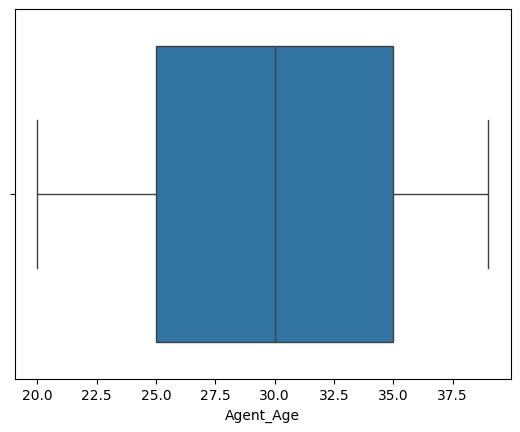

In [58]:
sns.boxplot(x=df_clean['Agent_Age'])

<Axes: xlabel='Agent_Age', ylabel='Count'>

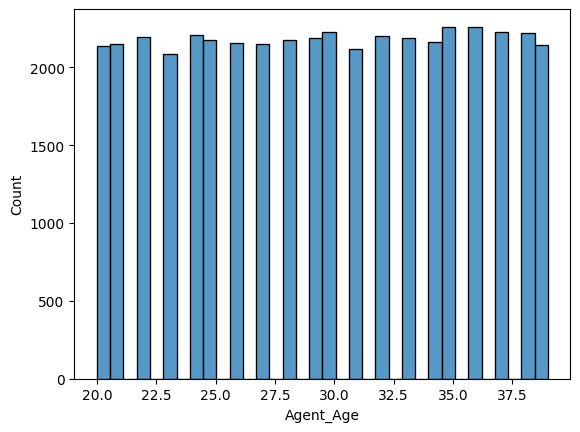

In [59]:
sns.histplot(x=df_clean['Agent_Age'])

In [60]:
df_clean[df_clean['Agent_Age']>39]

,Order_ID,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category


In [61]:
df_clean['Agent_Age'].info()

<class 'pandas.core.series.Series'>
Index: 43648 entries, 0 to 43738
Series name: Agent_Age
Non-Null Count  Dtype
--------------  -----
43648 non-null  int64
dtypes: int64(1)
memory usage: 682.0 KB


Delivery_Time

<Axes: xlabel='Delivery_Time', ylabel='Density'>

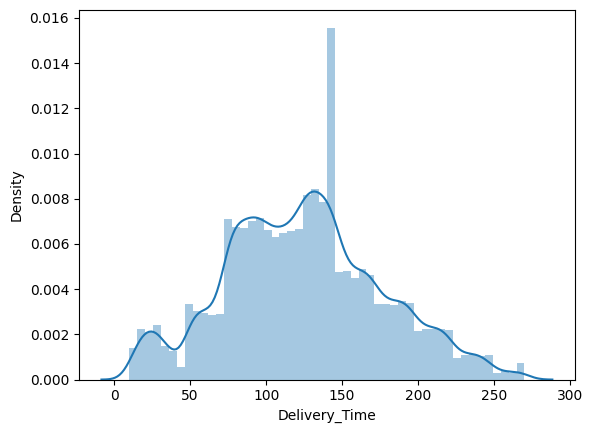

In [62]:
sns.distplot(df_clean['Delivery_Time'])

In [63]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  

    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [64]:
df_clean['Distance_km'] = haversine(
    df_clean['Store_Latitude'],
    df_clean['Store_Longitude'],
    df_clean['Drop_Latitude'],
    df_clean['Drop_Longitude']
)
df_clean['Distance_km'].describe()

count    43648.000000
mean        27.255432
std        303.815765
min          1.465067
25%          4.663432
50%          9.220419
75%         13.682165
max       6884.726399
Name: Distance_km, dtype: float64

<Axes: xlabel='Distance_km'>

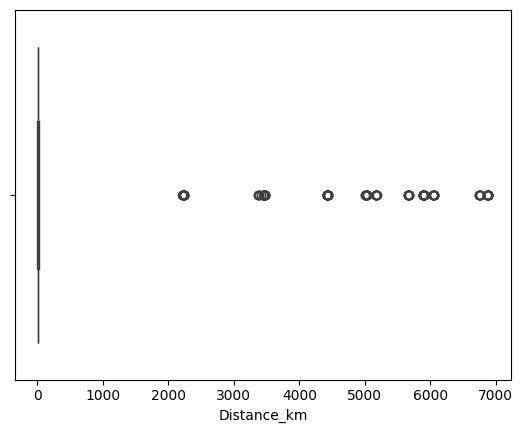

In [65]:
sns.boxplot(x=df_clean['Distance_km'])

In [66]:

Q1 = df_clean['Distance_km'].quantile(0.25)
Q3 = df_clean['Distance_km'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['Distance_km'] >= lower_bound) & (df_clean['Distance_km'] <= upper_bound)]

In [67]:
lower_bound

-8.864666379854032

In [68]:
upper_bound

27.210263170744977

In [69]:
df_clean['Distance_km'].describe()

count    43492.000000
mean         9.733464
std          5.604463
min          1.465067
25%          4.663412
50%          9.220178
75%         13.681416
max         20.969489
Name: Distance_km, dtype: float64

<Axes: xlabel='Distance_km'>

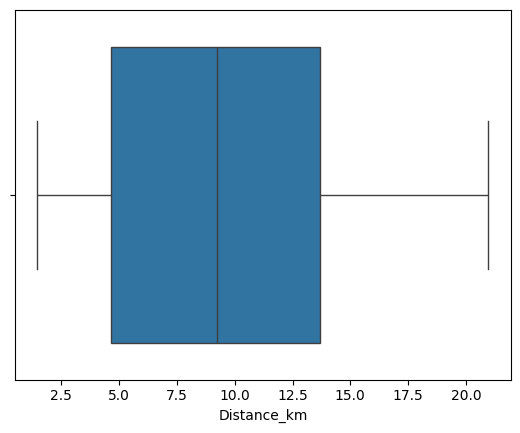

In [70]:
sns.boxplot(x=df_clean['Distance_km'])

In [71]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43492 entries, 0 to 43738
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43492 non-null  object        
 1   Agent_Age        43492 non-null  int64         
 2   Order_Rating     43492 non-null  float64       
 3   Store_Latitude   43492 non-null  float64       
 4   Store_Longitude  43492 non-null  float64       
 5   Drop_Latitude    43492 non-null  float64       
 6   Drop_Longitude   43492 non-null  float64       
 7   Order_Date       43492 non-null  datetime64[ns]
 8   Order_Time       43492 non-null  datetime64[ns]
 9   Pickup_Time      43492 non-null  datetime64[ns]
 10  Weather          43492 non-null  object        
 11  Traffic          43492 non-null  object        
 12  Vehicle          43492 non-null  object        
 13  Area             43492 non-null  object        
 14  Delivery_Time    43492 non-null  int64     

In [72]:
df_clean['order_dayofweek'] = df_clean['Order_Date'].dt.day_name()
df_clean['order_month_name'] = df_clean['Order_Date'].dt.month_name() 
df_clean['order_day'] = df_clean['Order_Date'].dt.day

In [73]:
df_clean

,Order_ID,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,order_dayofweek,order_month_name,order_day
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-07-18 11:30:00,2025-07-18 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,Saturday,March,19
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-07-18 19:45:00,2025-07-18 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,Friday,March,25
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2025-07-18 08:30:00,2025-07-18 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,Saturday,March,19
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2025-07-18 18:00:00,2025-07-18 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,Tuesday,April,5
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2025-07-18 13:30:00,2025-07-18 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,Saturday,March,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2025-07-18 11:35:00,2025-07-18 11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.489846,Thursday,March,24
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2025-07-18 19:55:00,2025-07-18 20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,11.007735,Wednesday,February,16
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,2025-07-18 23:50:00,2025-07-18 00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4.657195,Friday,March,11
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,2025-07-18 13:35:00,2025-07-18 13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,6.232393,Monday,March,7


In [74]:
df_clean['Pickup_Time'].isnull().sum()



0

In [75]:
#df_clean['Pickup_Time'] = df_clean['Pickup_Time'].astype(str).str.strip()
df_clean['Pickup_Time'] = df_clean['Pickup_Time'].replace(['NaN', 'null', '', ' '], np.nan)

In [76]:
df_clean['Order_Time'] = pd.to_datetime(df_clean['Order_Time'], errors='coerce')
df_clean['Pickup_Time'] = pd.to_datetime(df_clean['Pickup_Time'], errors='coerce')

In [77]:
df_clean['Order_OnlyTime'] = df_clean['Order_Time'].dt.time
df_clean['Pickup_OnlyTime'] = df_clean['Pickup_Time'].dt.time

In [78]:
df_clean['Pickup_Time'].isnull().sum()

0

In [79]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43492 entries, 0 to 43738
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          43492 non-null  object        
 1   Agent_Age         43492 non-null  int64         
 2   Order_Rating      43492 non-null  float64       
 3   Store_Latitude    43492 non-null  float64       
 4   Store_Longitude   43492 non-null  float64       
 5   Drop_Latitude     43492 non-null  float64       
 6   Drop_Longitude    43492 non-null  float64       
 7   Order_Date        43492 non-null  datetime64[ns]
 8   Order_Time        43492 non-null  datetime64[ns]
 9   Pickup_Time       43492 non-null  datetime64[ns]
 10  Weather           43492 non-null  object        
 11  Traffic           43492 non-null  object        
 12  Vehicle           43492 non-null  object        
 13  Area              43492 non-null  object        
 14  Delivery_Time     43492 non

In [80]:
df_clean['Order_Time'] = pd.to_datetime(df_clean['Order_Time'], errors='coerce')

In [81]:
df_clean

,Order_ID,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Vehicle,Area,Delivery_Time,Category,Distance_km,order_dayofweek,order_month_name,order_day,Order_OnlyTime,Pickup_OnlyTime
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-07-18 11:30:00,2025-07-18 11:45:00,...,motorcycle,Urban,120,Clothing,3.025149,Saturday,March,19,11:30:00,11:45:00
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-07-18 19:45:00,2025-07-18 19:50:00,...,scooter,Metropolitian,165,Electronics,20.183530,Friday,March,25,19:45:00,19:50:00
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2025-07-18 08:30:00,2025-07-18 08:45:00,...,motorcycle,Urban,130,Sports,1.552758,Saturday,March,19,08:30:00,08:45:00
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2025-07-18 18:00:00,2025-07-18 18:10:00,...,motorcycle,Metropolitian,105,Cosmetics,7.790401,Tuesday,April,5,18:00:00,18:10:00
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2025-07-18 13:30:00,2025-07-18 13:45:00,...,scooter,Metropolitian,150,Toys,6.210138,Saturday,March,26,13:30:00,13:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2025-07-18 11:35:00,2025-07-18 11:45:00,...,motorcycle,Metropolitian,160,Home,1.489846,Thursday,March,24,11:35:00,11:45:00
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2025-07-18 19:55:00,2025-07-18 20:10:00,...,motorcycle,Metropolitian,180,Jewelry,11.007735,Wednesday,February,16,19:55:00,20:10:00
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,2025-07-18 23:50:00,2025-07-18 00:05:00,...,scooter,Metropolitian,80,Home,4.657195,Friday,March,11,23:50:00,00:05:00
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,2025-07-18 13:35:00,2025-07-18 13:40:00,...,motorcycle,Metropolitian,130,Kitchen,6.232393,Monday,March,7,13:35:00,13:40:00


In [82]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43492 entries, 0 to 43738
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          43492 non-null  object        
 1   Agent_Age         43492 non-null  int64         
 2   Order_Rating      43492 non-null  float64       
 3   Store_Latitude    43492 non-null  float64       
 4   Store_Longitude   43492 non-null  float64       
 5   Drop_Latitude     43492 non-null  float64       
 6   Drop_Longitude    43492 non-null  float64       
 7   Order_Date        43492 non-null  datetime64[ns]
 8   Order_Time        43492 non-null  datetime64[ns]
 9   Pickup_Time       43492 non-null  datetime64[ns]
 10  Weather           43492 non-null  object        
 11  Traffic           43492 non-null  object        
 12  Vehicle           43492 non-null  object        
 13  Area              43492 non-null  object        
 14  Delivery_Time     43492 non

pickup_delay

In [83]:
df_clean['pickup_delay_minutes'] = (df_clean['Pickup_Time'] - df_clean['Order_Time']).dt.total_seconds() / 60

In [84]:
df_clean['pickup_delay_minutes'].unique()

array([   15.,     5.,    10., -1425., -1430., -1435.])

In [85]:
df_clean['pickup_delay_minutes'] = np.where(
    df_clean['pickup_delay_minutes'] < 0,
    df_clean['pickup_delay_minutes'] + 1440,
    df_clean['pickup_delay_minutes']
)

In [86]:
df_clean['pickup_delay_minutes'].unique()

array([15.,  5., 10.])

catigorate pick up delay

In [87]:
df_clean["delaying"] = np.where(
    df_clean["pickup_delay_minutes"] == 5, "low",
    np.where(
        df_clean["pickup_delay_minutes"] == 10, "medium",
        np.where(
            df_clean["pickup_delay_minutes"] == 15, "high",
            None  # Default value if none of the conditions match
        )
    )
)

In [88]:
df_clean["delaying"].unique()

array(['high', 'low', 'medium'], dtype=object)

In [89]:
df_clean['Order_Time'] = df_clean['Order_Time'].apply(
    lambda dt: dt.replace(year=2022) if pd.notnull(dt) else dt)

In [90]:
df_clean.describe()

,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Delivery_Time,Distance_km,order_day,pickup_delay_minutes
count,43492.000000,43492.000000,43492.000000,43492.000000,43492.000000,43492.000000,43492,43492,43492,43492.000000,43492.000000,43492.000000,43492.000000
mean,29.554792,4.635379,17.382100,70.731708,17.445700,70.795307,2022-03-13 18:21:29.285385472,2022-07-18 17:55:04.221465856,2025-07-18 17:37:42.836843264,124.935298,9.733464,13.810954,9.992068
min,20.000000,2.500000,0.000000,0.000000,0.010000,0.010000,2022-02-11 00:00:00,2022-07-18 00:00:00,2025-07-18 00:00:00,10.000000,1.465067,1.000000,5.000000
25%,25.000000,4.500000,12.934179,73.170283,12.985662,73.277753,2022-03-04 00:00:00,2022-07-18 15:25:00,2025-07-18 14:35:00,90.000000,4.663412,6.000000,5.000000
50%,30.000000,4.700000,18.554382,75.898497,18.632718,75.997648,2022-03-15 00:00:00,2022-07-18 19:15:00,2025-07-18 19:10:00,125.000000,9.220178,13.000000,10.000000
75%,35.000000,4.900000,22.732225,78.044095,22.783839,78.099117,2022-03-27 00:00:00,2022-07-18 21:35:00,2025-07-18 21:35:00,160.000000,13.681416,20.000000,15.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,2022-07-18 23:55:00,2025-07-18 23:55:00,270.000000,20.969489,31.000000,15.000000
std,5.762445,0.313685,7.339129,21.175376,7.340487,21.175546,NaN,NaN,NaN,51.948422,5.604463,8.721737,4.086908


catagorate age

In [91]:
bins=[20,30,40]
labels =  ['20-30', '30-40']

df_clean ['Age_segment']=pd.cut(df_clean['Agent_Age'] , bins=bins , labels=labels , right=False)

df_clean ['Age_segment']

0        30-40
1        30-40
2        20-30
3        30-40
4        30-40
         ...  
43734    30-40
43735    20-30
43736    30-40
43737    20-30
43738    20-30
Name: Age_segment, Length: 43492, dtype: category
Categories (2, object): ['20-30' < '30-40']

In [92]:
df_clean['Weather'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy'],
      dtype=object)

catigorate wheather

In [93]:
weather_map= {
    'Sunny':'Good Weather',
    'Sandstorms':'Bad Weather',
    'Cloudy':'Good Weather',
    'Windy':'Good Weather',
    'Stormy':'Bad Weather',
    'Fog':'Bad Weather'
    
}

df_clean['Weather_group']=df_clean['Weather'].map(weather_map)

In [94]:
df_clean['Weather_group'].unique()

array(['Good Weather', 'Bad Weather'], dtype=object)

In [95]:
df_clean.describe()

,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Delivery_Time,Distance_km,order_day,pickup_delay_minutes
count,43492.000000,43492.000000,43492.000000,43492.000000,43492.000000,43492.000000,43492,43492,43492,43492.000000,43492.000000,43492.000000,43492.000000
mean,29.554792,4.635379,17.382100,70.731708,17.445700,70.795307,2022-03-13 18:21:29.285385472,2022-07-18 17:55:04.221465856,2025-07-18 17:37:42.836843264,124.935298,9.733464,13.810954,9.992068
min,20.000000,2.500000,0.000000,0.000000,0.010000,0.010000,2022-02-11 00:00:00,2022-07-18 00:00:00,2025-07-18 00:00:00,10.000000,1.465067,1.000000,5.000000
25%,25.000000,4.500000,12.934179,73.170283,12.985662,73.277753,2022-03-04 00:00:00,2022-07-18 15:25:00,2025-07-18 14:35:00,90.000000,4.663412,6.000000,5.000000
50%,30.000000,4.700000,18.554382,75.898497,18.632718,75.997648,2022-03-15 00:00:00,2022-07-18 19:15:00,2025-07-18 19:10:00,125.000000,9.220178,13.000000,10.000000
75%,35.000000,4.900000,22.732225,78.044095,22.783839,78.099117,2022-03-27 00:00:00,2022-07-18 21:35:00,2025-07-18 21:35:00,160.000000,13.681416,20.000000,15.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,2022-07-18 23:55:00,2025-07-18 23:55:00,270.000000,20.969489,31.000000,15.000000
std,5.762445,0.313685,7.339129,21.175376,7.340487,21.175546,NaN,NaN,NaN,51.948422,5.604463,8.721737,4.086908


In [96]:
df_clean['Speed_kmph'] = df_clean['Distance_km'] / (df_clean['Delivery_Time'] / 60)


In [97]:
df_clean['Speed_kmph'].describe()

count    43492.000000
mean         5.928660
std          6.676002
min          0.339202
25%          2.634460
50%          4.322080
75%          6.805631
max        119.850915
Name: Speed_kmph, dtype: float64

In [98]:
df_clean['Speed_kmph'].describe()

count    43492.000000
mean         5.928660
std          6.676002
min          0.339202
25%          2.634460
50%          4.322080
75%          6.805631
max        119.850915
Name: Speed_kmph, dtype: float64

<Axes: xlabel='Speed_kmph'>

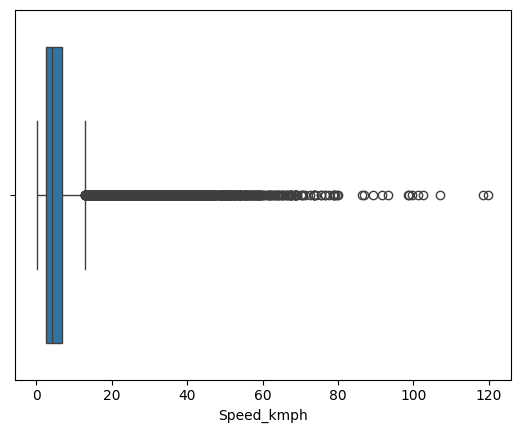

In [99]:
sns.boxplot(x=df_clean['Speed_kmph'])

In [100]:

Q1 = df_clean['Speed_kmph'].quantile(0.25)
Q3 = df_clean['Speed_kmph'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['Speed_kmph'] >= lower_bound) & (df_clean['Speed_kmph'] <= upper_bound)]

<Axes: xlabel='Speed_kmph'>

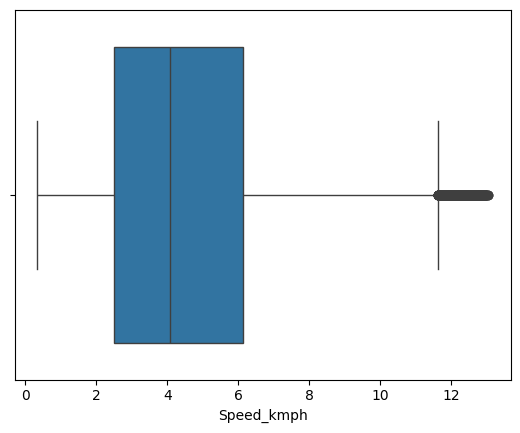

In [101]:
sns.boxplot(x=df_clean['Speed_kmph'])

In [102]:
df_clean["Speed_kmph"].describe()

count    40543.000000
mean         4.566878
std          2.716207
min          0.339202
25%          2.492568
50%          4.075466
75%          6.146442
max         13.057065
Name: Speed_kmph, dtype: float64

In [103]:
bins=[0,6,14 ]

labels=['slow','Fast']


df_clean['Speed_delivery']=pd.cut(df_clean['Speed_kmph'], bins=bins , labels=labels)



In [104]:
df_clean['Area'].unique()

array(['Urban', 'Metropolitian', 'Semi-Urban', 'Other'], dtype=object)

Q

1-Categories speed groups per  order rating


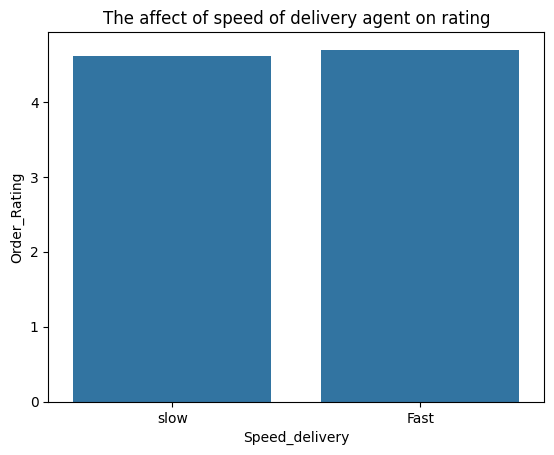

In [105]:
sns.barplot(x=df_clean["Speed_delivery"],y=df_clean["Order_Rating"])

plt.title('The affect of speed of delivery agent on rating')
plt.show()

what is the effect of the whether on delevary time

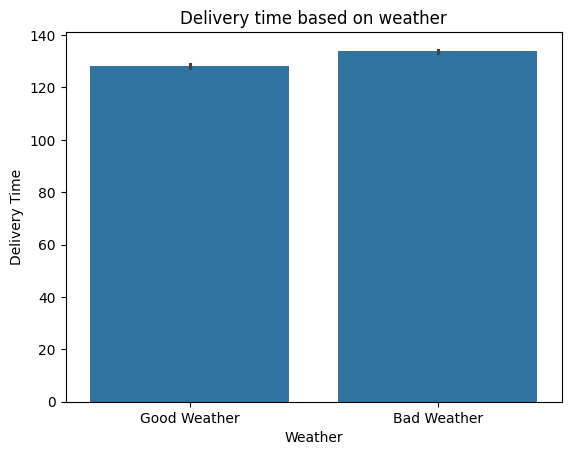

In [106]:
sns.barplot(x=df_clean['Weather_group'],y=df_clean["Delivery_Time"])

plt.xlabel('Weather') 
plt.ylabel('Delivery Time')
plt.title('Delivery time based on weather')
plt.show()

In [107]:
df_clean.groupby('Weather_group')['Delivery_Time'].mean()

Weather_group
Bad Weather     133.759463
Good Weather    128.198259
Name: Delivery_Time, dtype: float64

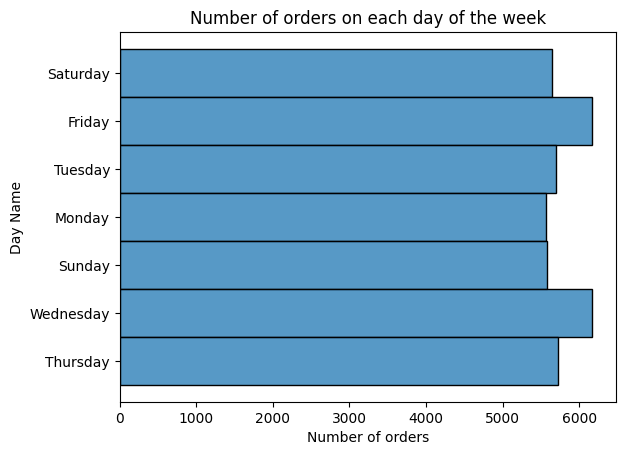

In [108]:
sns.histplot(y=df_clean['order_dayofweek'])

plt.xlabel('Number of orders') 
plt.ylabel('Day Name')
plt.title('Number of orders on each day of the week')
plt.show()

In [109]:
df_clean.groupby('order_dayofweek')['Order_ID'].count()

order_dayofweek
Friday       6168
Monday       5564
Saturday     5649
Sunday       5579
Thursday     5718
Tuesday      5695
Wednesday    6170
Name: Order_ID, dtype: int64

bigest number of orders is wednesday and friday

-----------------------------------------------------------

At what times of day are most orders placed or picked up?

In [110]:
df_clean['Order_Time'].info

<bound method Series.info of 0       2022-07-18 11:30:00
1       2022-07-18 19:45:00
2       2022-07-18 08:30:00
3       2022-07-18 18:00:00
4       2022-07-18 13:30:00
                ...        
43734   2022-07-18 11:35:00
43735   2022-07-18 19:55:00
43736   2022-07-18 23:50:00
43737   2022-07-18 13:35:00
43738   2022-07-18 17:10:00
Name: Order_Time, Length: 40543, dtype: datetime64[ns]>

In [111]:
df_clean['Hours']=df_clean['Order_Time'].dt.hour

In [112]:
df_clean['Hours'].describe()

count    40543.000000
mean        17.275757
std          4.852501
min          0.000000
25%         14.000000
50%         19.000000
75%         21.000000
max         23.000000
Name: Hours, dtype: float64

In [113]:
df_clean.groupby('Hours')['Order_ID'].count()


Hours
0      373
8     1798
9     1913
10    1967
11    1937
12     858
13     754
14     752
15     824
16     679
17    3890
18    4095
19    4237
20    4159
21    4281
22    4039
23    3987
Name: Order_ID, dtype: int64

-----------------------------

In [ ]:
bins=[0,12,17,21,23.999]
labels =  ['morning', 'afternoon',"evening","night"]

df_clean ['Hours_cat']=pd.cut(df_clean['Hours'] , bins=bins , labels=labels , right=False)

df_clean ['Hours_cat']

0          morning
1          evening
2          morning
3          evening
4        afternoon
           ...    
43734      morning
43735      evening
43736        night
43737    afternoon
43738      evening
Name: Hours_cat, Length: 40543, dtype: category
Categories (4, object): ['morning' < 'afternoon' < 'evening' < 'night']

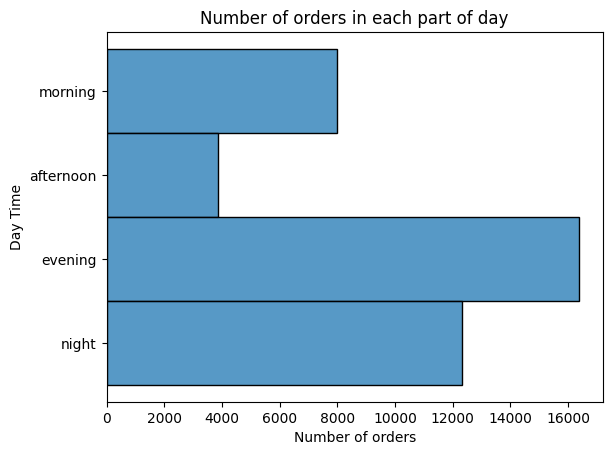

In [115]:
sns.histplot(y=df_clean['Hours_cat'])

plt.xlabel('Number of orders') 
plt.ylabel('Day Time')
plt.title('Number of orders in each part of day')
plt.show()

what is the  area contain bigest count of order

In [116]:
df_clean["Area"].value_counts()


Area
Metropolitian    30481
Urban             8896
Other             1022
Semi-Urban         144
Name: count, dtype: int64

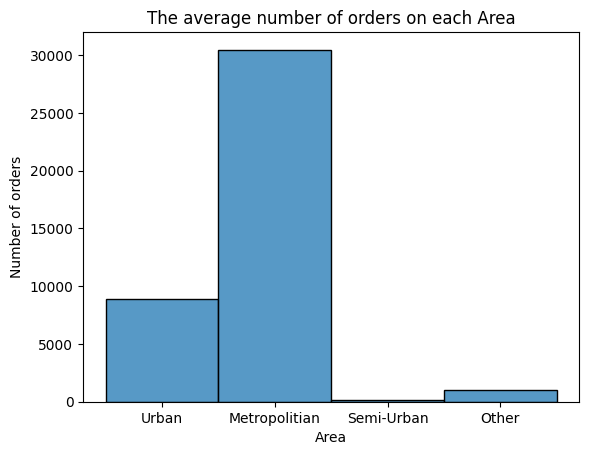

In [117]:
sns.histplot(x=df_clean['Area'])

plt.ylabel('Number of orders')
plt.title('The average number of orders on each Area')
plt.show()

In [118]:
df_clean["Area"][df_clean["Area"]=="Semi-Urban"].count()

144

sns.histplot(y=df_clean['Hours'])

What is the average delivery time for each area?

In [119]:
df_clean.groupby('Area')['Delivery_Time'].mean()


Area
Metropolitian    135.723598
Other            110.888454
Semi-Urban       249.166667
Urban            115.293165
Name: Delivery_Time, dtype: float64

What is the average rating for each area?

In [120]:
df_clean.groupby('Area')["Order_Rating"].mean()

Area
Metropolitian    4.622050
Other            4.659980
Semi-Urban       4.473611
Urban            4.669357
Name: Order_Rating, dtype: float64

relation btween delevary time and rating

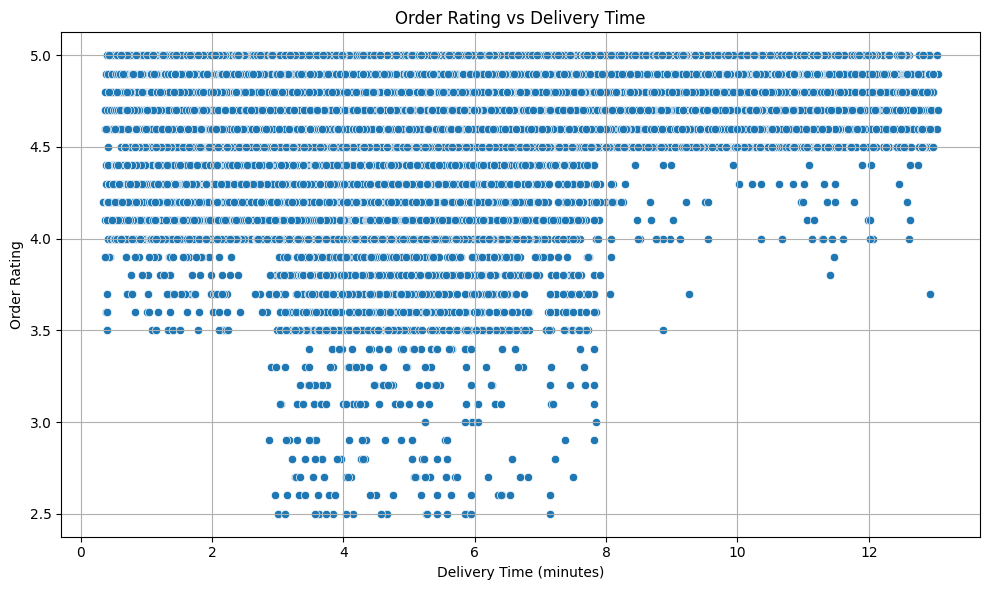

In [121]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x='Speed_kmph',
    y='Order_Rating',
     
)
plt.title('Order Rating vs Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Order Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

the most use vicle is motorcycle

In [122]:
countvic=df_clean['Vehicle'].value_counts()
countvic

Vehicle
motorcycle     23874
scooter        13431
van             3238
Name: count, dtype: int64

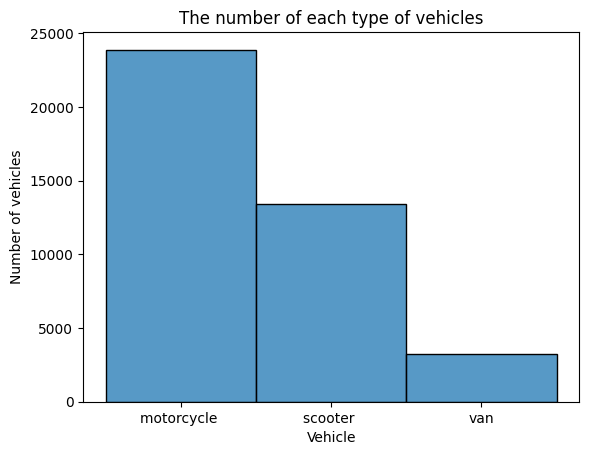

In [123]:
sns.histplot(x=df_clean['Vehicle'])

plt.ylabel('Number of vehicles')
plt.title('The number of each type of vehicles')
plt.show()

In [124]:
print(countvic.idxmax(),countvic.max(),"times")


motorcycle  23874 times


Which orders had the longest delays ? 

In [125]:
df_clean['Total_Time'] = df_clean['pickup_delay_minutes'] + df_clean['Delivery_Time']

 
max_row = df_clean[df_clean['Total_Time']== df_clean['Total_Time'].max()]
max_row['Order_ID']

4389     fmhc264174901
5220     sxmq906078292
7564     bluj913410554
9200     dfok769837192
10752    zvsw063629454
12911    gcai258433443
13811    vikw454772496
14211    mqyi564944433
15928    rgqn742431536
17394    snjs609594252
25708    xshq693763954
28835    kkdk062668297
28874    pvdo881565918
32293    zccf620212710
34152    exea886521836
34805    tbtn165096985
35300    ilnf409711919
37922    twwb487889296
38446    wjdd308296840
41768    kkmb394221265
Name: Order_ID, dtype: object

In [126]:
df_clean['Total_Time'].describe()

count    40543.000000
mean       141.003675
std         48.192308
min         15.000000
25%        105.000000
50%        140.000000
75%        170.000000
max        285.000000
Name: Total_Time, dtype: float64

In [127]:
bins=[0,60,120,200,285]
labels=["0-60 min","60_120 min","120_200 min","200-285 min"]
df_clean["total_time_groups"]=pd.cut(df_clean['Total_Time'],bins=bins,labels=labels)
df_clean["total_time_groups"]

0        120_200 min
1        120_200 min
2        120_200 min
3         60_120 min
4        120_200 min
            ...     
43734    120_200 min
43735    120_200 min
43736     60_120 min
43737    120_200 min
43738    120_200 min
Name: total_time_groups, Length: 40543, dtype: category
Categories (4, object): ['0-60 min' < '60_120 min' < '120_200 min' < '200-285 min']

In [128]:
print("max delay minits = ",max_row["Total_Time"].iloc[0])


max delay minits =  285.0


In [129]:
print("max delay hours = ",max_row["pickup_delay_minutes"].iloc[0])

max delay hours =  15.0


In [130]:
grouped_time_area = df_clean.groupby(['Area', 'total_time_groups']).size().unstack()
print(grouped_time_area)

total_time_groups  0-60 min  60_120 min  120_200 min  200-285 min
Area                                                             
Metropolitian           764        9260        16398         4059
Other                    53         523          394           52
Semi-Urban                0           0            0          144
Urban                   420        4237         3623          616


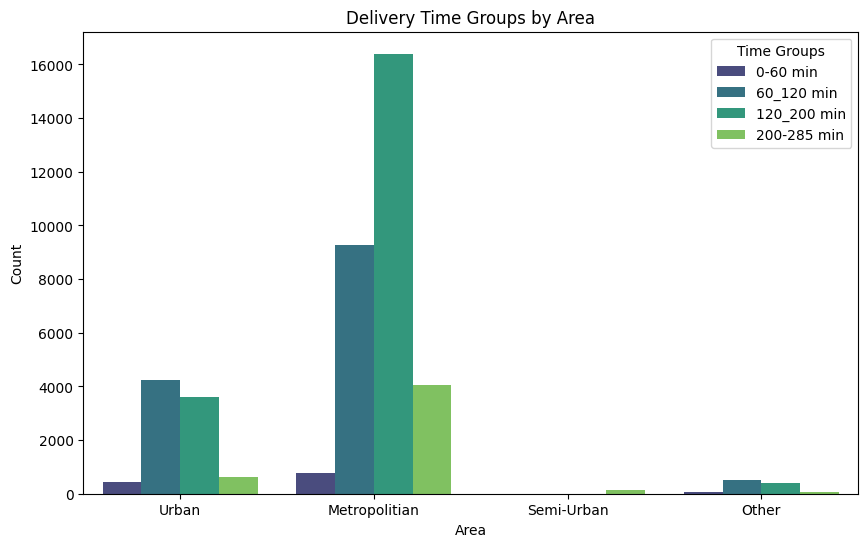

In [131]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Area', hue='total_time_groups', palette='viridis')
plt.title('Delivery Time Groups by Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='Time Groups')
plt.show()

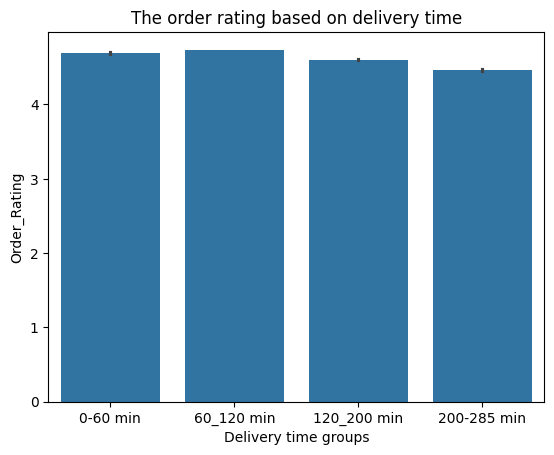

In [132]:
sns.barplot(x=df_clean["total_time_groups"],y=df_clean["Order_Rating"])

plt.xlabel('Delivery time groups') 
plt.title('The order rating based on delivery time')
plt.show()

How much time passed between order time and pickup time? 

In [133]:
df_clean['pickup_delay_minutes']

0        15.0
1         5.0
2        15.0
3        10.0
4        15.0
         ... 
43734    10.0
43735    15.0
43736    15.0
43737     5.0
43738     5.0
Name: pickup_delay_minutes, Length: 40543, dtype: float64

What are the average agent ratings overall?

In [134]:
average_agent_ratings=df_clean['Order_Rating'].mean()


In [135]:
print("average_agent_ratings = " ,average_agent_ratings )

average_agent_ratings =  4.63285893989098


What is the average delivery distance? 

In [136]:
average_dest=df_clean['Distance_km'].mean()
print("avrage distance =",average_dest,"km" )

avrage distance = 9.426250767482799 km


age effect on dilivary speed

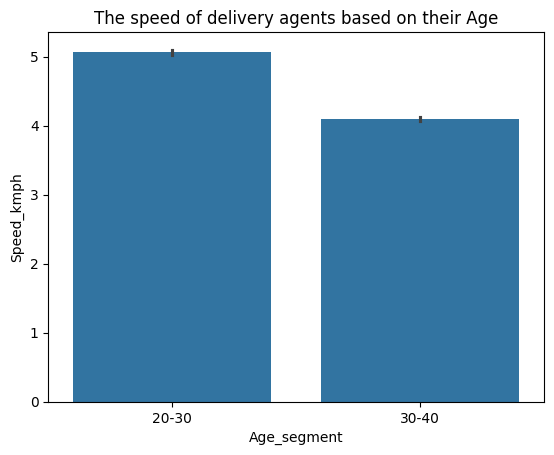

In [137]:
sns.barplot(x=df_clean['Age_segment'],y=df_clean["Speed_kmph"])

plt.title('The speed of delivery agents based on their Age')
plt.show()

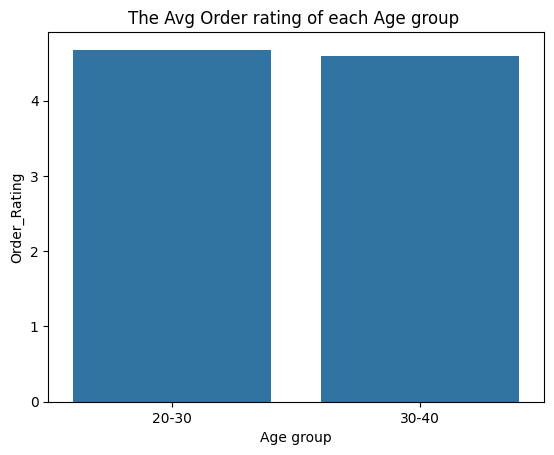

In [138]:
sns.barplot(x=df_clean['Age_segment'],y=df_clean["Order_Rating"])

plt.xlabel('Age group') 
plt.title('The Avg Order rating of each Age group ')
plt.show()

best vihcle in evrey area
++++

In [139]:
grouped = df_clean.groupby(['Area', 'Vehicle'])['Order_Rating'].mean().reset_index()

In [140]:
grouped

,Area,Vehicle,Order_Rating
0,Metropolitian,motorcycle,4.617934
1,Metropolitian,scooter,4.626563
2,Metropolitian,van,4.634554
3,Other,motorcycle,4.627748
4,Other,scooter,4.701809
5,Other,van,4.681250
6,Semi-Urban,motorcycle,4.466667
7,Semi-Urban,scooter,4.544444
8,Semi-Urban,van,4.566667
9,Urban,motorcycle,4.654216


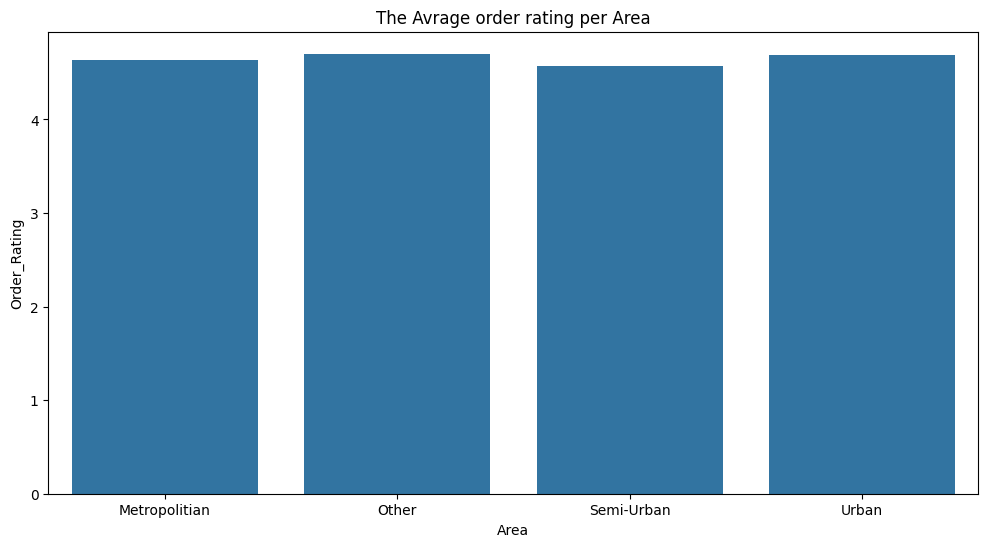

In [141]:
grouped = df_clean.groupby(['Area', 'Vehicle'])['Order_Rating'].mean().reset_index()


best_vehicle_per_area = grouped.loc[grouped.groupby('Area')['Order_Rating'].idxmax()].reset_index(drop=True)


plt.figure(figsize=(12, 6))
sns.barplot(data=best_vehicle_per_area, x='Area', y='Order_Rating')


plt.title('The Avrage order rating per Area')
plt.show()

In [142]:
grouped = df_clean.groupby(['Area', 'Vehicle'])["Speed_kmph"].mean().reset_index()
grouped

,Area,Vehicle,Speed_kmph
0,Metropolitian,motorcycle,4.328459
1,Metropolitian,scooter,4.767476
2,Metropolitian,van,4.801180
3,Other,motorcycle,4.866486
4,Other,scooter,5.233067
5,Other,van,5.270022
6,Semi-Urban,motorcycle,3.003026
7,Semi-Urban,scooter,4.198394
8,Semi-Urban,van,2.904427
9,Urban,motorcycle,4.582459


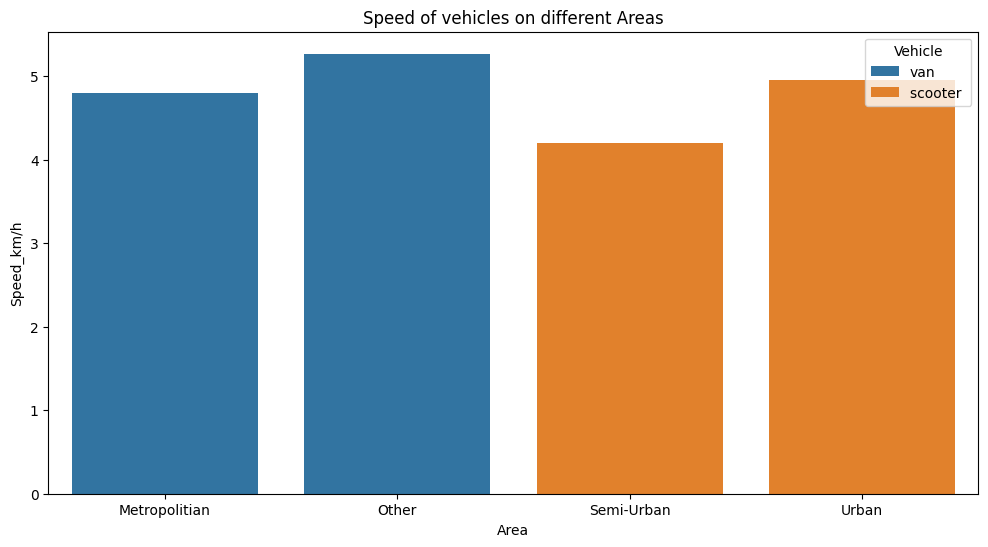

In [143]:
grouped = df_clean.groupby(['Area', 'Vehicle'])['Speed_kmph'].mean().reset_index()


best_vehicle_per_area = grouped.loc[grouped.groupby('Area')['Speed_kmph'].idxmax()].reset_index(drop=True)


plt.figure(figsize=(12, 6))
sns.barplot(data=best_vehicle_per_area, x='Area', y='Speed_kmph', hue='Vehicle')


plt.ylabel('Speed_km/h')
plt.title('Speed of vehicles on different Areas')
plt.show()

In [144]:
grouped = df_clean.groupby(['Weather_group'])["Speed_kmph"].mean().reset_index()
grouped


,Weather_group,Speed_kmph
0,Bad Weather,4.481555
1,Good Weather,4.654613


In [145]:
grouped = df_clean.groupby(['Weather_group', 'Vehicle'])["Speed_kmph"].mean().reset_index()
grouped


,Weather_group,Vehicle,Speed_kmph
0,Bad Weather,motorcycle,4.288673
1,Bad Weather,scooter,4.748499
2,Bad Weather,van,4.786578
3,Good Weather,motorcycle,4.487040
4,Good Weather,scooter,4.902133
5,Good Weather,van,4.872204


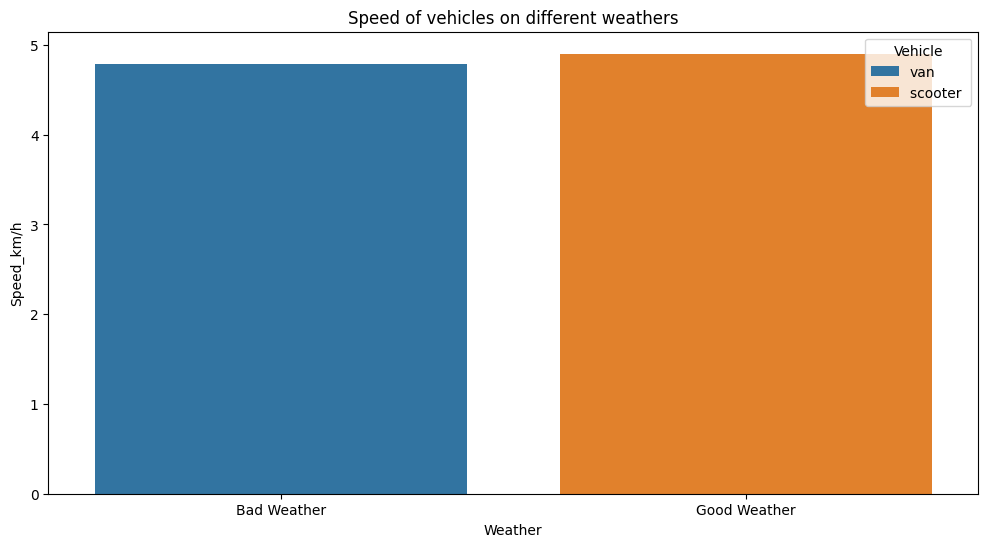

In [146]:
grouped = df_clean.groupby(['Weather_group', 'Vehicle'])['Speed_kmph'].mean().reset_index()


best_vehicle_per_area = grouped.loc[grouped.groupby('Weather_group')['Speed_kmph'].idxmax()].reset_index(drop=True)


plt.figure(figsize=(12, 6))
sns.barplot(data=best_vehicle_per_area, x='Weather_group', y='Speed_kmph', hue='Vehicle')

plt.xlabel('Weather') 
plt.ylabel('Speed_km/h')
plt.title('Speed of vehicles on different weathers')
plt.show()

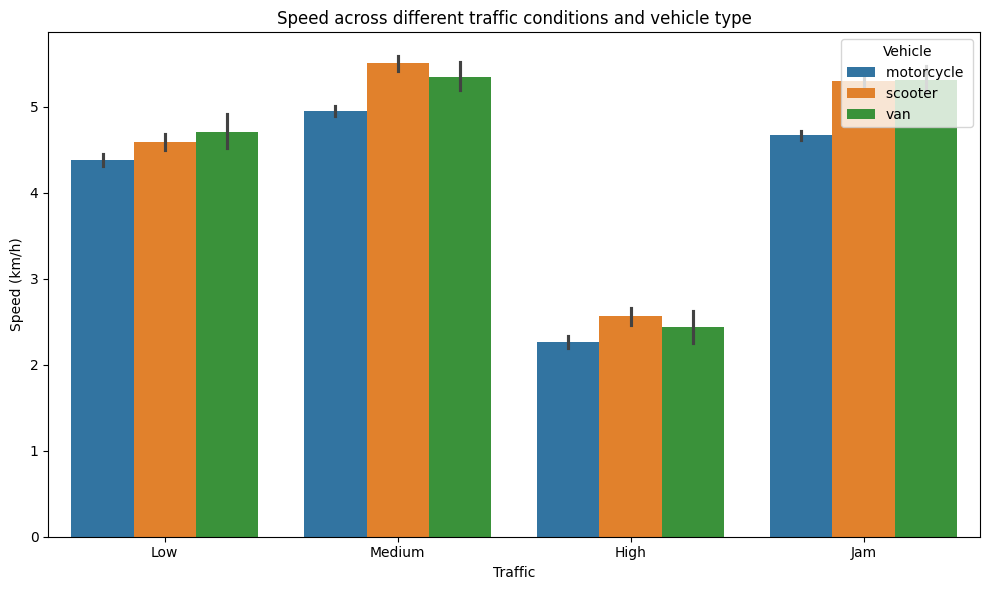

In [196]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x="Traffic", y="Speed_kmph", order=["Low", "Medium", "High", "Jam"], hue='Vehicle')
plt.title("Speed across different traffic conditions and vehicle type")
plt.ylabel("Speed (km/h)")
plt.xlabel("Traffic")

plt.legend(title="Vehicle", loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

relationship between day time and traffic

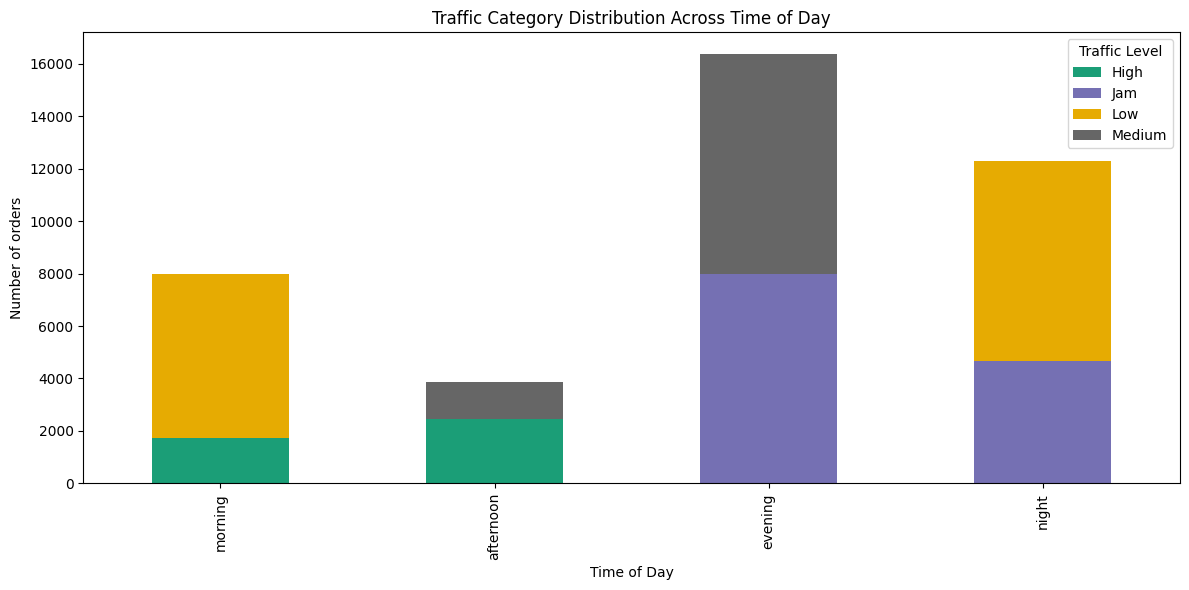

In [195]:

count_data = pd.crosstab(df_clean['Hours_cat'], df_clean['Traffic'])

count_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Dark2')
plt.title("Traffic Category Distribution Across Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of orders")
plt.legend(title="Traffic Level")
plt.tight_layout()
plt.show()


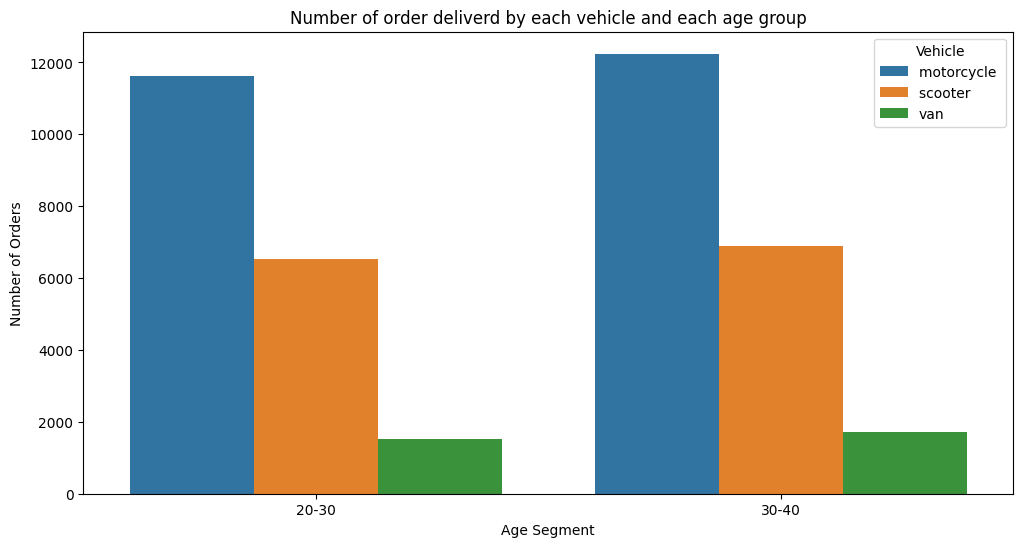

In [167]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x="Age_segment", hue="Vehicle")
plt.title("Number of order deliverd by each vehicle and each age group")
plt.xlabel("Age Segment")
plt.ylabel("Number of Orders")
plt.legend(title="Vehicle")
plt.show()

In [152]:
df_clean.groupby("Age_segment")["Vehicle"].apply(lambda x: x.mode()[0])


Age_segment
20-30    motorcycle 
30-40    motorcycle 
Name: Vehicle, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


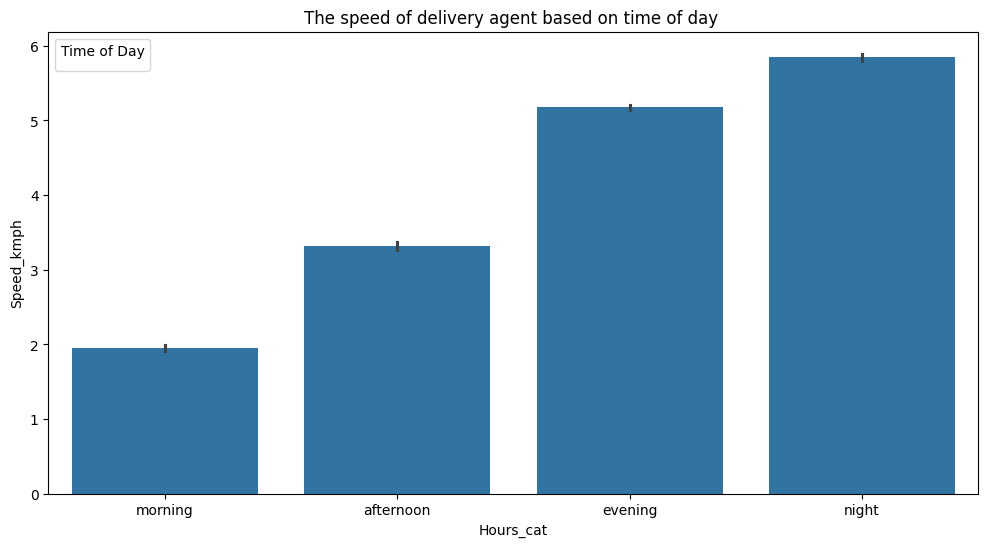

In [166]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_clean, y="Speed_kmph", x="Hours_cat")
plt.title("The speed of delivery agent based on time of day ")
plt.xlabel("Hours_cat")
plt.ylabel("Speed_kmph")
plt.legend(title="Time of Day")
plt.show()

In [155]:
df_clean.groupby("delaying")["Order_Rating"].mean()


delaying
high      4.635251
low       4.632267
medium    4.631059
Name: Order_Rating, dtype: float64

In [998]:
df_clean.groupby("Category")["pickup_delay_minutes"].mean().idxmax()

'Clothing'